In [119]:
import numpy as np
import matplotlib.pyplot as plt
from river import metrics, utils

import lobo_funcs as lobo
import novelty

In [12]:
random_state = np.random.RandomState(42)

In [ ]:
def pred_vs_real(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['x'], data['y'], alpha=0.5)
    plt.title('Scatter Plot of data_synth')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
    sorted_dataset = data.sort_values(by=['x'])
    X = list(map(lambda x: {'x': x}, sorted_dataset['x']))
    Y = sorted_dataset['y'].values.tolist()

    metric_synth = utils.Rolling(metrics.MAE(), window_size=1000) # metrics.MAE()
    maes_synth=[]
    dif_interval=[]

    models_synth = {
            'lower': lobo.make_model_synth(alpha=0.05),
            'center': lobo.make_model_synth(alpha=0.5),
            'upper': lobo.make_model_synth(alpha=0.95)
    }

    y_trues_synth = []
    y_preds_synth = {
            'lower': [],
            'center': [],
            'upper': []
    }

    for x, y in zip(X, Y):
        y_trues_synth.append(y)

        for name, model in models_synth.items():
            y_preds_synth[name].append(model.predict_one(x))
            model.learn_one(x, y)

        dif_interval.append(y_preds_synth['upper'][-1]-y_preds_synth['lower'][-1])

        # Update the error metric
        metric_synth.update(y, y_preds_synth['center'][-1])
        maes_synth.append(metric_synth.get())
        
    for i, mae in enumerate(maes_synth):
        if mae < 0:
            print(f"MAE is negative at index {i}, value: {maes_synth}")

    # Plot the results
    plt.rcParams.update({'font.size': 15})

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(alpha=0.75)
    ax.set_xlabel(r'$Time\ steps$')
    ax.set_ylabel(r'$Sensor\ reading\ values$')
    ax.plot(sorted_dataset.index,y_trues_synth, lw=3, color='#2ecc71', alpha=0.8, label=r'$Real\ sensor\ reading$')
    ax.plot(sorted_dataset.index,y_preds_synth['center'], lw=3, color='#e74c3c', alpha=0.8, label=r'$Prediction\ sensor\ reading$')
    # ax.plot(sorted_dataset.index,dif_interval, lw=3, color='orange', alpha=0.8, label='Diff Prediction interval')
    ax.fill_between(sorted_dataset.index,y_preds_synth['lower'], y_preds_synth['upper'], color='#e74c3c', alpha=0.3, label=r'$Prediction\ interval$')
    plt.axvline(x=(data.shape[0]/2)-1,linestyle='--',color='k')
    ax.grid(False)
    # ax.annotate(r'Concept 1',xy=(150,2.0), fontsize=12)
    # ax.annotate(r'Concept 2',xy=(750,-1.0), fontsize=12)
    ax.legend(loc='upper left',fancybox=True,framealpha=1.0,frameon=True)
    ax.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax.twinx()    # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel(r'$MAE$', color='tab:blue')    # we already handled the x-label with ax1
    ax2.plot(sorted_dataset.index, maes_synth, color='tab:blue', lw=3,alpha=0.8, label=r'Rolling $MAE\ evolution$')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.legend(loc='lower right', fancybox=True, framealpha=0.3)
    fig.tight_layout()    # otherwise the right y-label is slightly clipped

    plt.show()

In [174]:
data_synth_none = lobo.normalizeData(
                lobo.generateRegressionDataSetWithSuddenDrift(
                    intercept=[[0,10], [0,10], [0,10]], 
                    domain=[range(0, 25000), range(25000, 25050), range(25050, 50000)],
                    noise=[
                        random_state.normal(0, 2, 25000), 
                        random_state.normal(0, 2, 50),
                        random_state.normal(0, 2, 25050)
                    ]
                )
            )

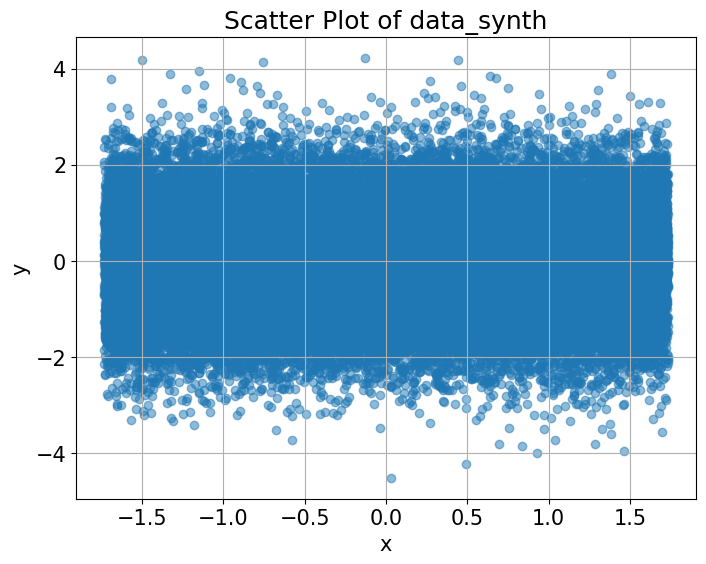

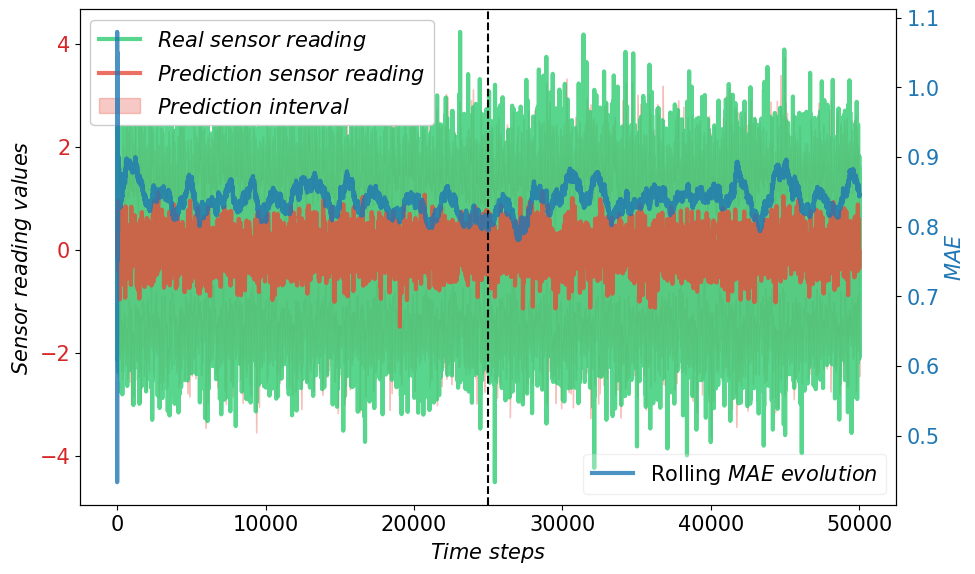

In [175]:
pred_vs_real(data_synth_none)

In [176]:
data_synth_ephemeral = lobo.normalizeData(
                lobo.generateRegressionDataSetWithSuddenDrift(
                    intercept=[[0,10], [0,30], [0,10]], 
                    domain=[range(0, 25000), range(25000, 25050), range(25050, 50000)],
                    noise=[
                        random_state.normal(0, 2, 25000), 
                        random_state.normal(0, 2, 50),
                        random_state.normal(0, 2, 25050)
                    ]
                )
            )

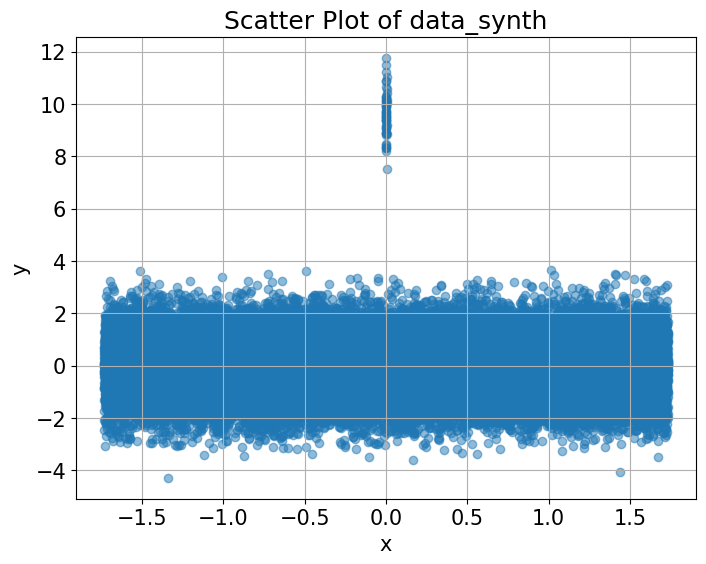

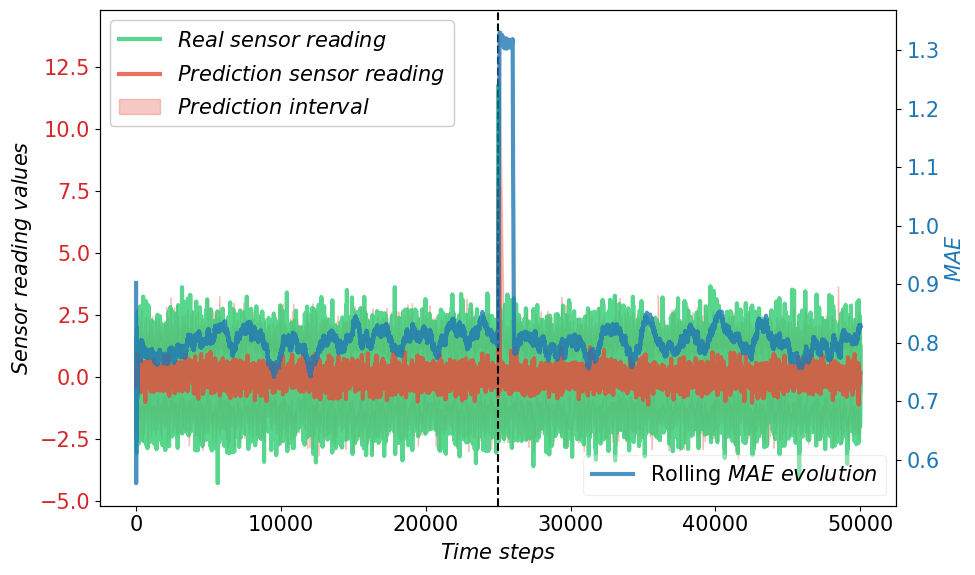

In [177]:
pred_vs_real(data_synth_ephemeral)

In [178]:
data_synth_persistent = lobo.normalizeData(
                lobo.generateRegressionDataSetWithSuddenDrift(
                    intercept=[[0,10], [0,30], [0,30]], 
                    domain=[range(0, 25000), range(25000, 25050), range(25050, 50000)],
                    noise=[
                        random_state.normal(0, 2, 25000), 
                        random_state.normal(0, 2, 50),
                        random_state.normal(0, 2, 25050)
                    ]
                )
            )

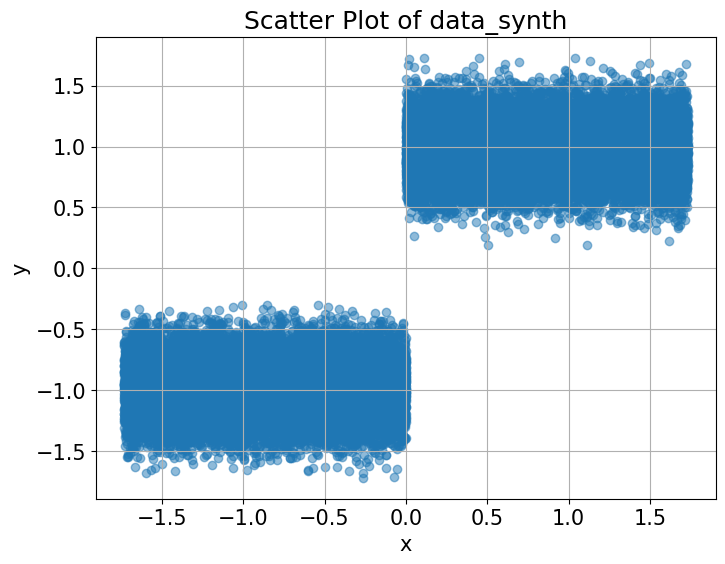

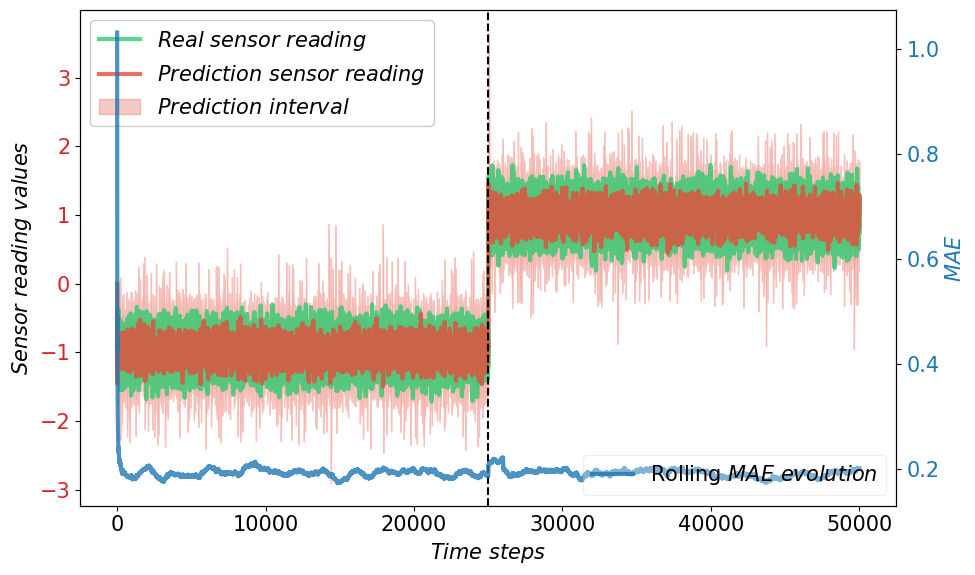

In [179]:
pred_vs_real(data_synth_persistent)

In [180]:
data_synth_periodic = lobo.normalizeData(
                lobo.generateRegressionDataSetWithSuddenDrift(
                    intercept=[[0,10]] + [[0, 30] if i % 5000 else [0, 10] for i in range(10000, 50000, 2500)], 
                    domain=[range(0, 10000)] + [range(i, i + 2500) for i in range(10000, 50000, 2500)],
                    noise=[random_state.normal(0, 2, 10000)] + [random_state.normal(0, 2, 2500) for _ in range(10000, 50000, 2500)]
                )
            )

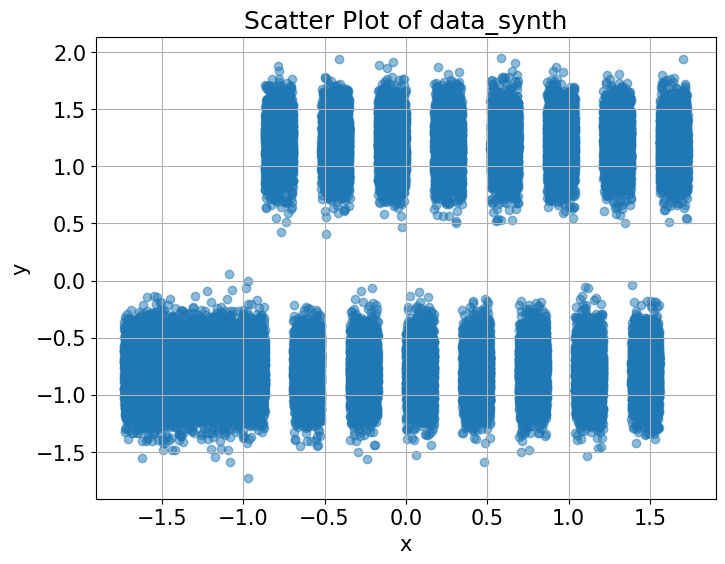

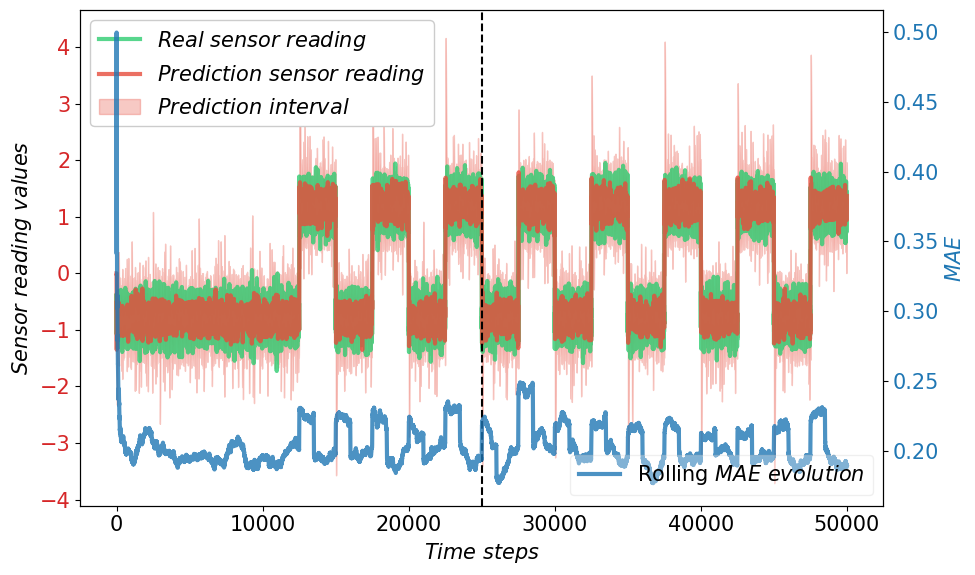

In [181]:
pred_vs_real(data_synth_periodic)